In [36]:
import matplotlib.pyplot as plt 
import matplotlib as mpl  
from matplotlib.ticker import ScalarFormatter
import pandas as pd

In [37]:
# Set default figure size
mpl.rcParams['figure.figsize'] = (20,20)
df = pd.read_csv(r'C:\Users\**\BTCUSD_day.csv',index_col = 0, parse_dates = True, usecols = ['Date','Close'])  
print(df.head());     

               Close
Date                
2021-03-08  52095.96
2021-03-07  50591.21
2021-03-06  49610.32
2021-03-05  48648.76
2021-03-04  47339.92


In [38]:
#rsi method
def rsi(df, periods = 14, ema = True):
    
    df = df.dropna();
    close_delta = df['Close'].diff()

    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:

        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean();
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean();
    else:
        ma_up = up.rolling(window = periods, adjust=False).mean();
        ma_down = down.rolling(window = periods, adjust=False).mean();
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [39]:
rsi_data = rsi(df,14, True);

In [40]:
MA_50 = df['Close'].rolling(window = 50).mean()  
df['MA_50'] = MA_50 
MA_20 = df['Close'].rolling(window = 20).mean() 
df['MA_20'] = MA_20 

print(df.head());  
df = df.dropna();
print(df.head());  

               Close  MA_50  MA_20
Date                              
2021-03-08  52095.96    NaN    NaN
2021-03-07  50591.21    NaN    NaN
2021-03-06  49610.32    NaN    NaN
2021-03-05  48648.76    NaN    NaN
2021-03-04  47339.92    NaN    NaN
               Close       MA_50       MA_20
Date                                        
2021-01-18  36509.42  43212.9372  34427.5095
2021-01-17  35089.93  42872.8166  34237.1085
2021-01-16  36215.22  42585.2968  34077.0815
2021-01-15  36549.31  42324.0766  34035.5380
2021-01-14  38706.52  42125.2318  34093.2860


In [41]:
#create buy sell signal
buy_list = []  
sell_list = []


for i in range(len(df)):  
    if df.MA_20.iloc[i] > df.MA_50.iloc[i] and df.MA_20.iloc[i-1] < df.MA_50.iloc[i-1]:
        buy_list.append(i) 
    elif df.MA_20.iloc[i] < df.MA_50.iloc[i] and df.MA_20.iloc[i-1] > df.MA_50.iloc[i-1]: 
        sell_list.append(i)  


df['Buy'] = df['Close'].iloc[buy_list]  
df['Sell'] = df['Close'].iloc[sell_list] 

df.head();

,Close,MA_50,MA_20,Buy,Sell
Date,,,,,
2021-01-18,36509.42,43212.9372,34427.5095,NaN,NaN
2021-01-17,35089.93,42872.8166,34237.1085,NaN,NaN
2021-01-16,36215.22,42585.2968,34077.0815,NaN,NaN
2021-01-15,36549.31,42324.0766,34035.5380,NaN,NaN
2021-01-14,38706.52,42125.2318,34093.2860,NaN,NaN


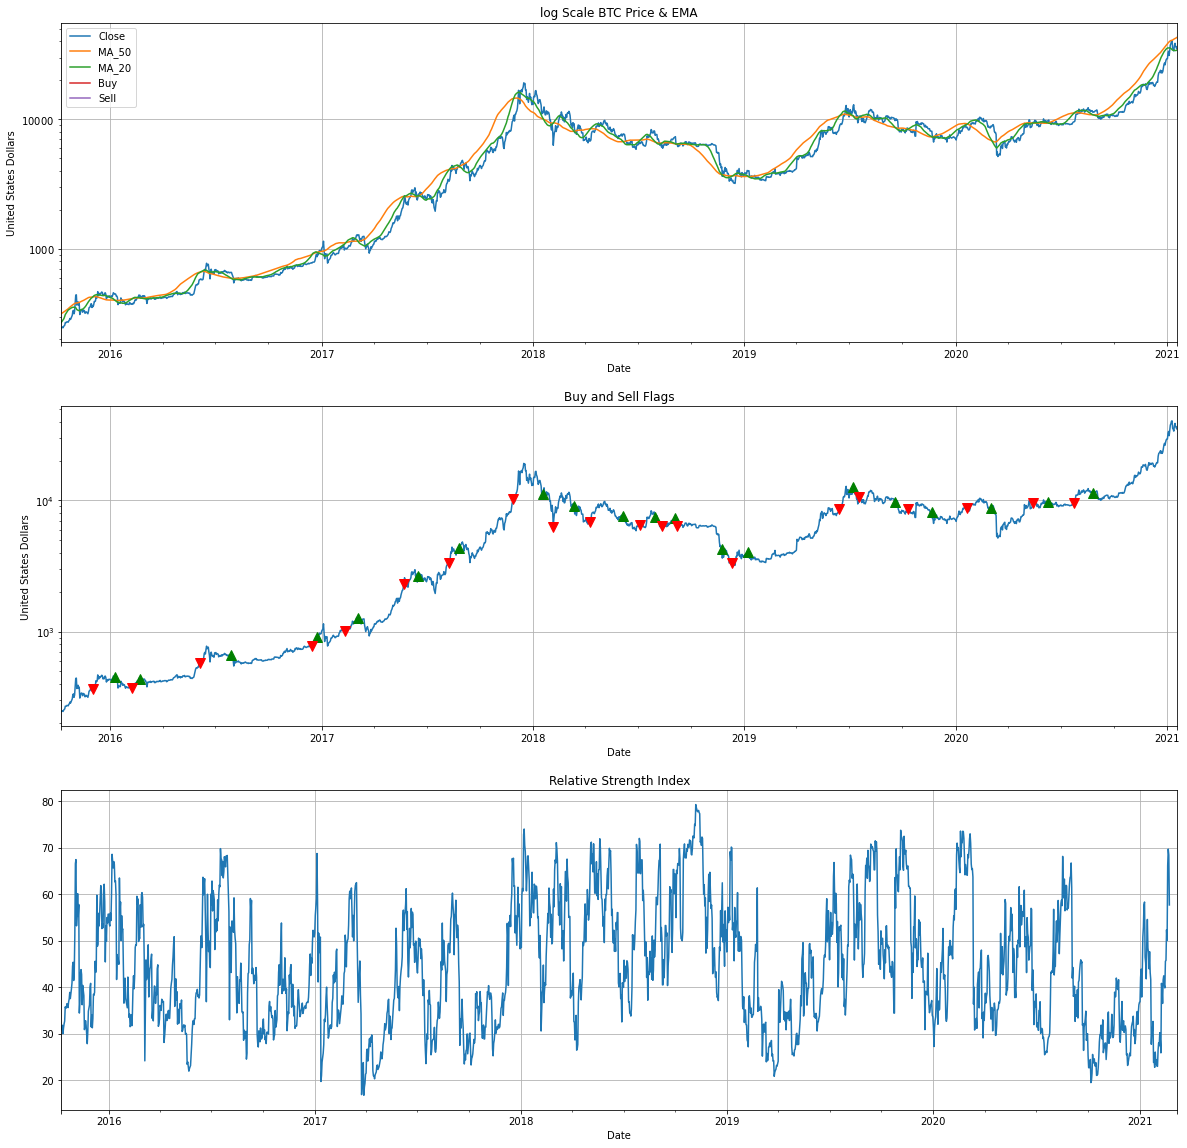

In [44]:
# Plot the data
fig, axes = plt.subplots(nrows=3, ncols=1)  # Create a figure with 2 subplots

df.plot(ax=axes[0], logy = True, grid = True)  # Plot the data on the first subplot in log scale
axes[0].set(title = "log Scale BTC Price & EMA", ylabel = "United States Dollars")  # Set the title and y-axis label
axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars

# plot buy and sell flags against the price
df['Close'].plot(ax=axes[1], grid = True)  # Plot the data on the second subplot
df['Buy'].plot(ax=axes[1], logy = True, grid = True, marker = '^', markersize=10, color = 'green', linestyle = 'None')  # Plot the data on the first subplot
df['Sell'].plot(ax=axes[1], logy = True, grid = True, marker = 'v', markersize=10, color = 'red', linestyle = 'None')  # Plot the data on the first subplot
axes[1].set(title = "Buy and Sell Flags", ylabel = "United States Dollars");  # Set the title and y-axis label


rsi_data.plot(ax=axes[2], grid = True);
axes[2].set(title = "Relative Strength Index");